In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import torch, os

# Adjust to point to the actual root of your project
PROJECT_ROOT = Path.cwd().parent  # or Path("/absolute/path/to/your/project")
sys.path.insert(0, str(PROJECT_ROOT))

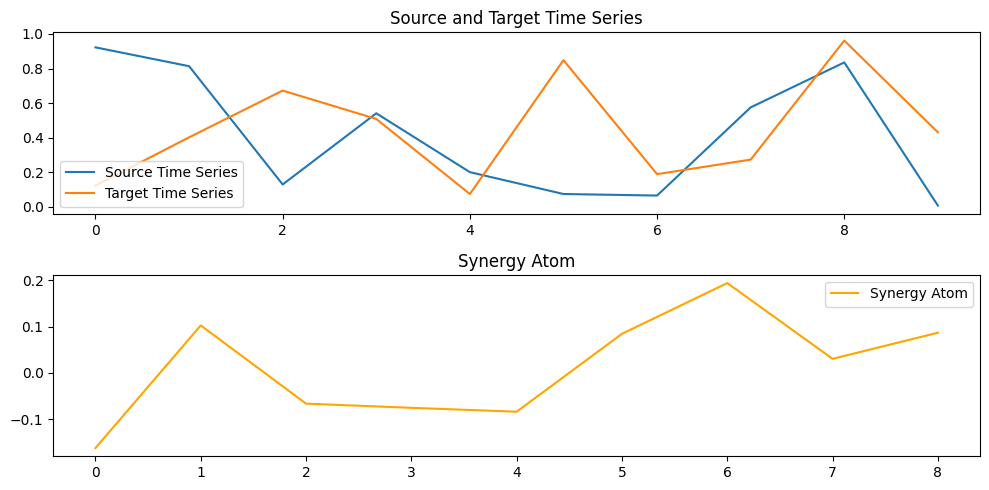

In [2]:
from phyid.calculate import calc_PhiID 
import matplotlib.pyplot as plt


# create a random matrix
import numpy as np

for _ in range(10):
    src = np.random.rand(10)  # Uniform [0, 1) distribution
    trg = np.random.rand(10)  # Uniform [0, 1) distribution
    tau = 1
    atoms_res, calc_res = calc_PhiID(src=src, trg=trg, tau=tau)
    syn = atoms_res['sts']

# plot the time series and the synergy atom
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(src, label='Source Time Series')
plt.plot(trg, label='Target Time Series')
plt.title('Source and Target Time Series')
plt.legend()    
plt.subplot(2, 1, 2)
plt.plot(syn, label='Synergy Atom', color='orange')
plt.title('Synergy Atom')
plt.legend()
plt.tight_layout()
plt.show()



MultiPromptActivations successfully loaded from '../data/activations/multi_prompt_activations.pkl'.


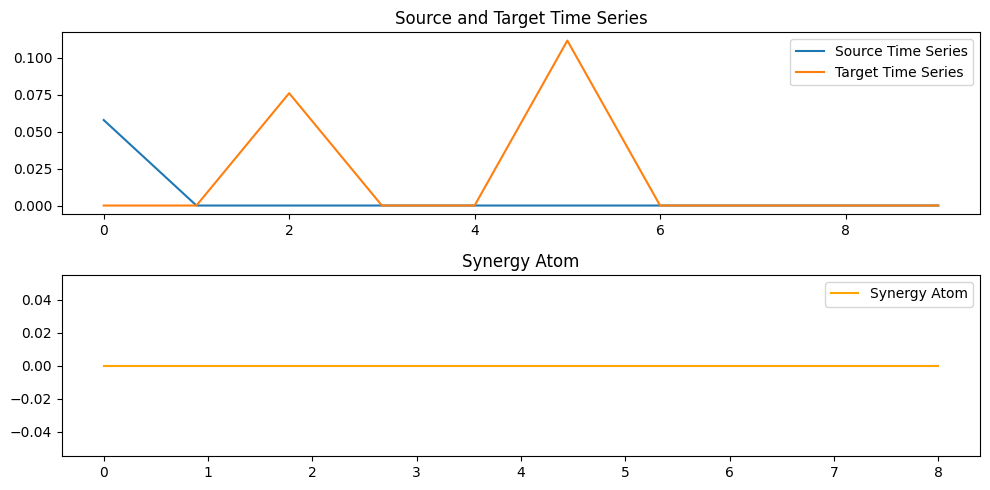

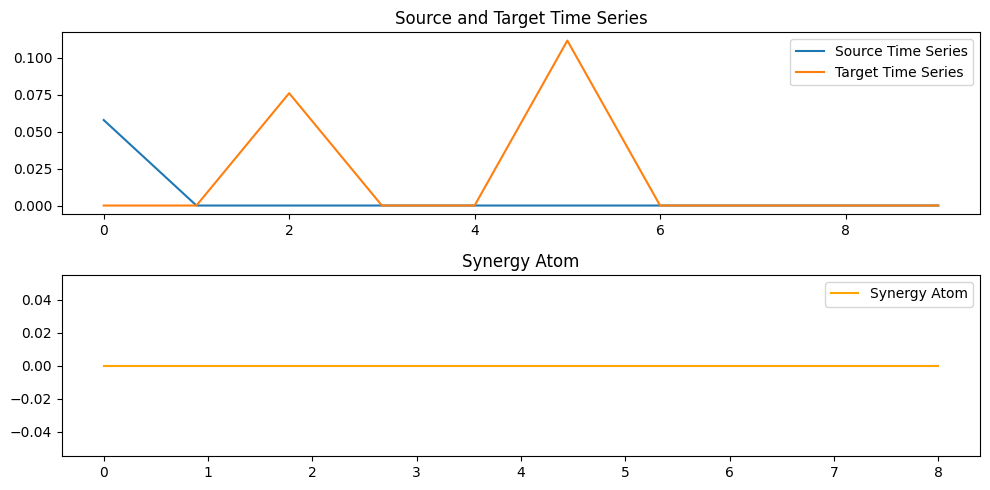

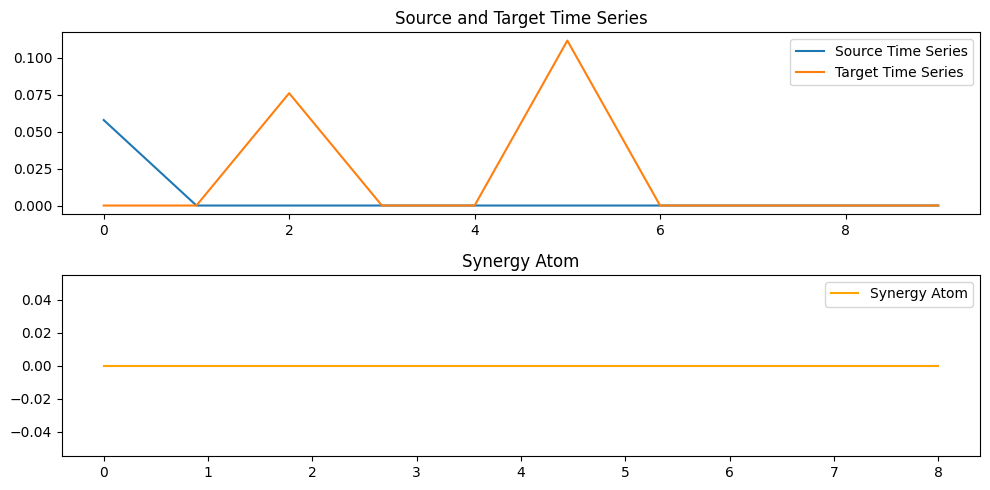

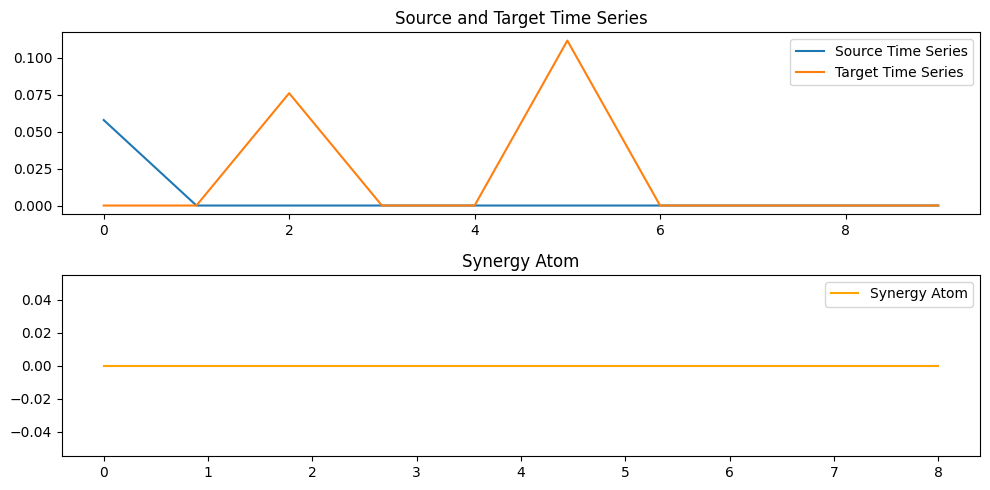

In [10]:
from src.activation_recorder import MultiPromptActivations
import torch

save_dir ='.plots/'
save = True
save_dir = "../data/activations"
file_path = os.path.join(save_dir, "multi_prompt_activations.pkl")
activations = MultiPromptActivations.load(file_path)

for noise in [1e-6, 1e-5, 1e-4, 1e-3]:
    src, trg = [], []
    for step_idx, model_activations in activations.prompts[0].steps.items():
        layer =  model_activations.layers[4]
        moe = layer.moe
        e0 = moe.experts[1]
        e1 = moe.experts[3]
        src.append(e0.gate_value if e0.gate_value is not None else 0)
        trg.append(e1.gate_value if e1.gate_value is not None else 0)
    tau = 1

    # Add small random noise to the source and target time series
    # src = np.array(src) + np.random.normal(0, noise, len(src))
    # trg = np.array(trg) + np.random.normal(0, noise, len(trg))

    kind = 'discrete'  # gaussian, discrete

    atoms_res, calc_res = calc_PhiID(src=src, trg=trg, tau=tau, kind=kind)
    syn = atoms_res['sts']

    # plot the time series and the synergy atom
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.plot(src, label='Source Time Series')
    plt.plot(trg, label='Target Time Series')
    plt.title('Source and Target Time Series')
    plt.legend()    
    plt.subplot(2, 1, 2)
    plt.plot(syn, label='Synergy Atom', color='orange')
    plt.title('Synergy Atom')
    plt.legend()
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(save_dir, f"synergy_atom_noise_{noise}_{kind}.png"))  
    else:
        plt.show()

